In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_dir='Z:\ML Course\Clustering\Data'

In [ ]:
os.chdir(data_dir)

In [4]:
data=pd.read_csv("C:\\Users\\Raushan Kumar\\Downloads\kc_housingdata.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.dtypes

In [6]:
## Choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','bathrooms','sqft_living']]

In [7]:
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [8]:
## Scale the data, using pandas
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_scaled=data_num.apply(scale,axis=0)

In [9]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [10]:
## Scale the data using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(data_num,axis=0)

In [11]:
print (dat_scaled)
print ("Type of output is "+str(type(dat_scaled)))
print ("Shape of the object is "+str(dat_scaled.shape))

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is (21613, 4)


In [12]:
## Create a cluster model
import sklearn.cluster as cluster

In [13]:
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled)

In [14]:
kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [15]:
kmeans.cluster_centers_

array([[-0.01957736,  0.37380584,  0.38614893,  0.2496839 ],
       [-0.46188924, -0.71585842, -0.84979354, -0.78456415],
       [ 1.9684173 ,  1.08912192,  1.57244433,  1.97024331]])

In [16]:
## Elbow method
from scipy.spatial.distance import cdist
K=range(1,20)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / dat_scaled.shape[0])


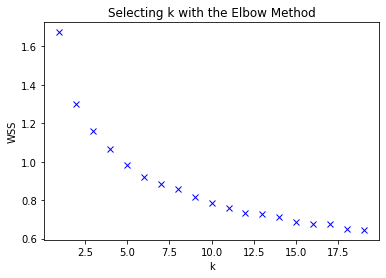

In [17]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [20]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled).labels_

In [21]:
metrics.silhouette_score(dat_scaled,labels,metric="euclidean",sample_size=10000,random_state=200)

0.2835292946671927

In [22]:
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 sample_size=1000,random_state=200)))

Silhoutte score for k= 7 is 0.27749569568576365
Silhoutte score for k= 8 is 0.2876565619801347
Silhoutte score for k= 9 is 0.2827955568043907
Silhoutte score for k= 10 is 0.2795895054563025
Silhoutte score for k= 11 is 0.2851598005065985
Silhoutte score for k= 12 is 0.2796213359680435


In [24]:
## Let's try to find the cluster profiles
import os
os.chdir("Z:\ML Course\Clustering\Codes")

In [29]:
def get_zprofiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().subtract(data.drop('Labels',axis=1).mean(),axis=1)
    profile=profile.divide(data.drop('Labels',axis=1).std(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

def get_profiles(data,kmeans):
    data['Labels']=kmeans.labels_
    profile=data.groupby('Labels').mean().divide(data.drop('Labels',axis=1).mean(),axis=1)
    profile['Size']=data['Labels'].value_counts()
    return profile

In [30]:
## Let's look for profiles for 8,9,10 clusters
kmeans=cluster.KMeans(n_clusters=8,random_state=200).fit(dat_scaled)

In [31]:
get_zprofiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,6.532184,1.281713,2.697215,3.763440,151
1,-0.533242,-0.283190,-1.007730,-0.769869,4318
2,0.286600,2.131736,1.041321,1.033369,1075
3,-0.251766,0.803417,0.142785,0.058131,4184
4,-0.491532,-1.570758,-1.204206,-1.068536,2465
5,0.682058,0.359309,0.764040,1.032956,3007
6,-0.185013,-0.494153,0.230790,-0.210886,5476
7,2.385575,0.932359,1.744246,2.224733,937


In [32]:
get_profiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,5.440280,1.353642,1.982286,2.661858,151
1,0.637527,0.921864,0.633000,0.660042,4318
2,1.194817,1.588176,1.379234,1.456314,1075
3,0.828861,1.221674,1.052000,1.025670,4184
4,0.665879,0.566606,0.561446,0.528157,2465
5,1.463632,1.099138,1.278252,1.456132,3007
6,0.874236,0.863656,1.084050,0.906877,5476
7,2.621605,1.257251,1.635228,1.982396,937
